In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.tri as tri

In [2]:
def convert_list_to_array(input_list):
    # Initialize an empty list to store all the numbers
    all_numbers = []
    
    # Iterate through each string in the input list
    for string in input_list:
        # Split the string by whitespace and convert each number to float
        numbers = [float(num) for num in string.strip().split()]
        # Extend the all_numbers list with these numbers
        all_numbers.extend(numbers)
    
    # Convert the list of all numbers to a numpy array
    return np.array(all_numbers)

In [3]:
def mask_dims(vars, xmin, max, ymin, ymax):
    # Apply z mask
    mask = vars[2]<0.5
    vars = [var[mask] for var in vars]

    # Apply x mask
    mask = vars[0]>xmin
    vars = [var[mask] for var in vars]
    mask = vars[0]<xmax
    vars = [var[mask] for var in vars]

    # Apply y mask
    mask = vars[1]>ymin
    vars = [var[mask] for var in vars]
    mask = vars[1]<ymax
    vars = [var[mask] for var in vars]

    return vars

In [4]:
xmin, xmax = -0.5, 1.5
ymin, ymax = -0.5, 0.5

In [5]:
file_path = 'data/case_1005_surf_0.dat'  # Replace with your file path
with open(file_path, 'r') as f:
    s = f.readlines()

In [6]:
# Extract wall zone
ncols = 5
nvars = 8

nnods = []
nelms = []

wall_vars = []

for i, line in enumerate(s):
    if line.strip().startswith('ZONE T="wall"'):
        nnod = int(s[i+2].split('=')[1].split()[0].split(',')[0])
        nelm = int(s[i+2].split('=')[2].split()[0].split(',')[0])

        if nnod % ncols == 0:
            nrows = nnod//ncols
        else:
            nrows = nnod//ncols + 1

        for j in range(nvars):
            offset = nrows*j
            dat = convert_list_to_array(s[offset+i+5:offset+i+nrows+5])
            wall_vars.append(dat)

        break


wall_vars = mask_dims(wall_vars, xmin, max, ymin, ymax)

In [41]:
# Extract symm zone
ncols = 5
nvars = 8

nnods = []
nelms = []

sym_vars = []

for i, line in enumerate(s):
    if line.strip().startswith('ZONE T="sym"'):
        nnod = int(s[i+2].split('=')[1].split()[0].split(',')[0])
        nelm = int(s[i+2].split('=')[2].split()[0].split(',')[0])

        if nnod % ncols == 0:
            nrows = nnod//ncols
        else:
            nrows = nnod//ncols + 1

        for j in range(nvars):
            offset = nrows*j
            dat = convert_list_to_array(s[offset+i+5:offset+i+nrows+5])
            sym_vars.append(dat)

        break

sym_vars = mask_dims(sym_vars, 1.5*xmin, 1.5*xmax, 1.5*ymin, 1.5*ymax)

In [42]:
# Extract far zone
ncols = 5
nvars = 8

nnods = []
nelms = []

far_vars = []

for i, line in enumerate(s):
    if line.strip().startswith('ZONE T="far"'):
        nnod = int(s[i+2].split('=')[1].split()[0].split(',')[0])
        nelm = int(s[i+2].split('=')[2].split()[0].split(',')[0])

        if nnod % ncols == 0:
            nrows = nnod//ncols
        else:
            nrows = nnod//ncols + 1

        for j in range(nvars):
            offset = nrows*j
            dat = convert_list_to_array(s[offset+i+5:offset+i+nrows+5])
            far_vars.append(dat)

        break

far_vars = mask_dims(far_vars, xmin, xmax, ymin, ymax)

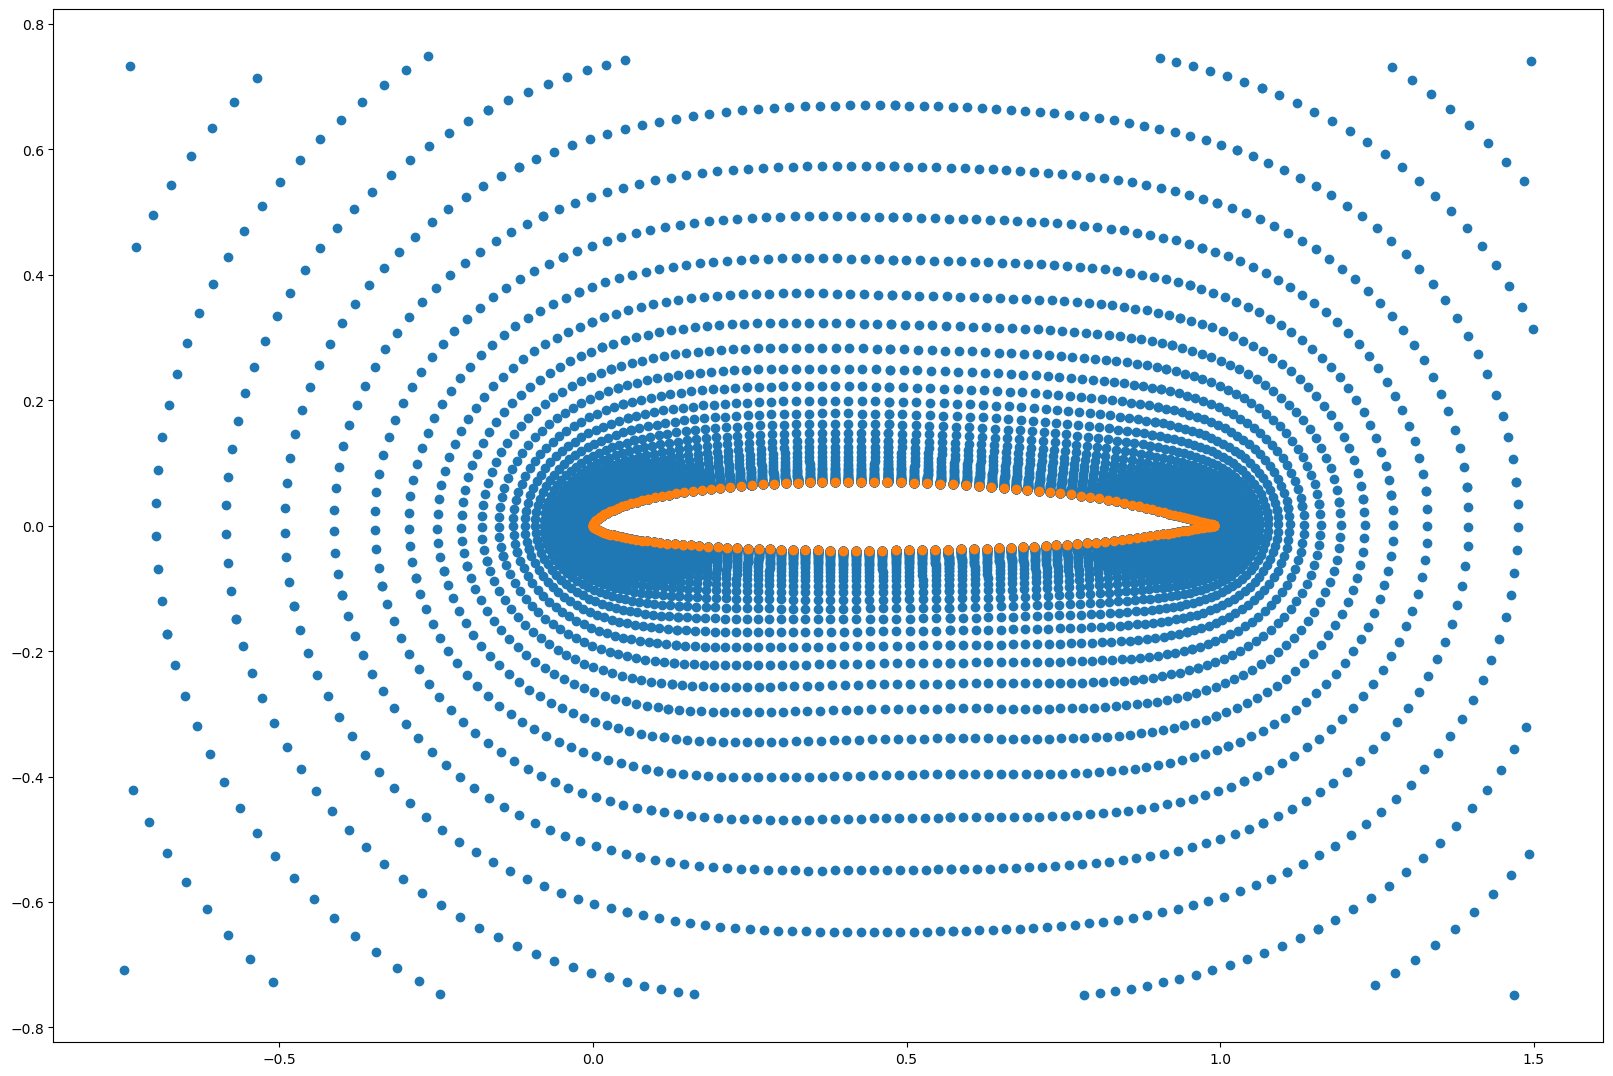

In [43]:
fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(sym_vars[0], sym_vars[1])
ax.scatter(wall_vars[0], wall_vars[1])

ax.set_aspect('equal')
#ax.set_xlim([-.5,1.5])
#ax.set_ylim([-.5,.5])

plt.show()

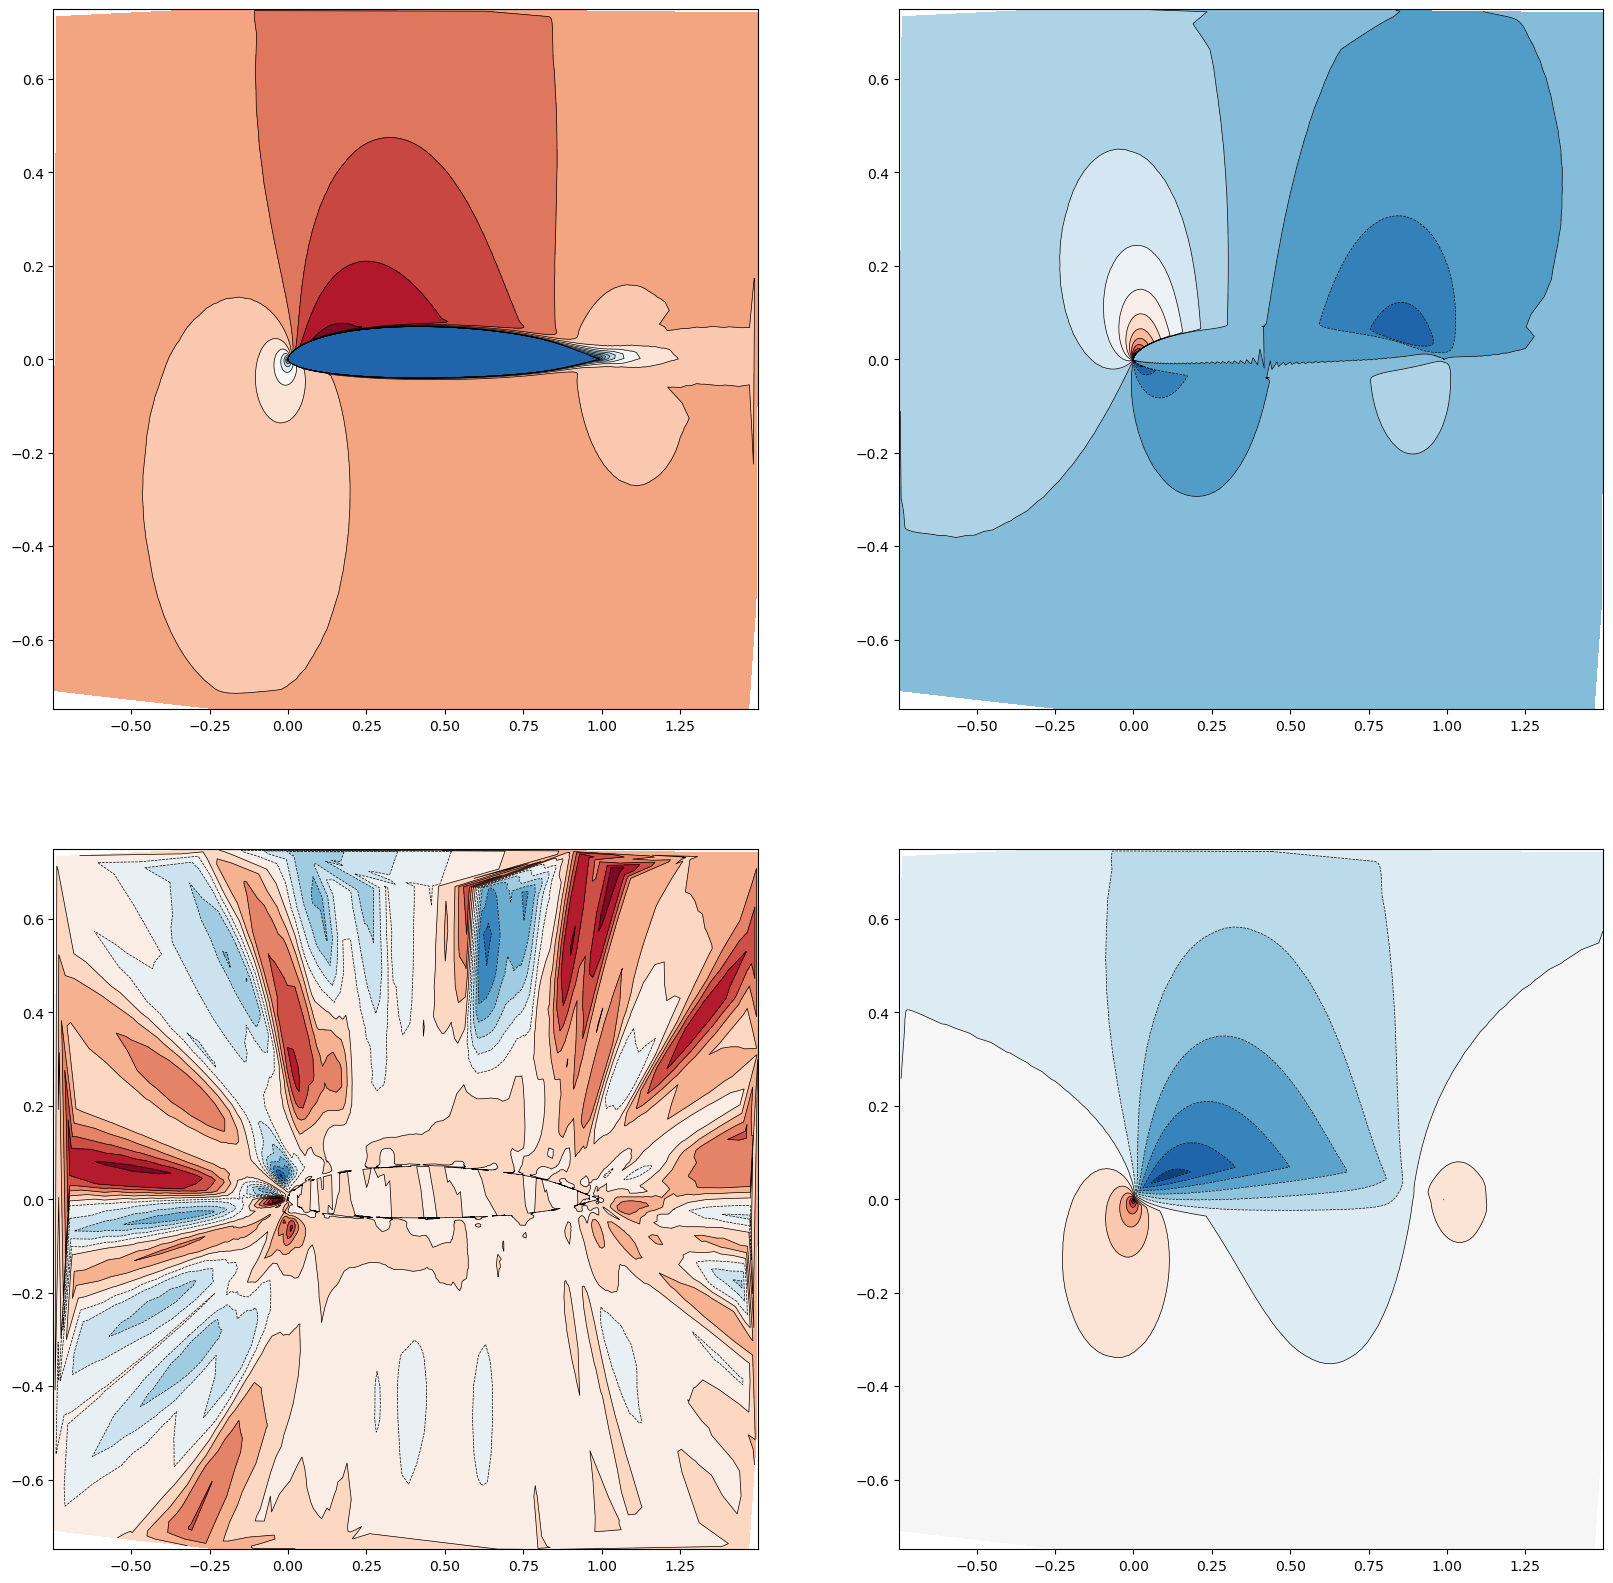

In [44]:
fig, axs = plt.subplots(nrows= 2, ncols = 2, figsize=(20,20))
x, y = sym_vars[0], sym_vars[1]

for i, ax in enumerate(axs.reshape(-1)):
    z = sym_vars[3+i]
    ax.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
    cntr2 = ax.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

In [45]:
ngrid = 256
ngridx = ngrid
ngridy = ngrid
xi = np.linspace(xmin, xmax, ngridx)
yi = np.linspace(ymin, ymax, ngridy)

z = sym_vars[3]

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

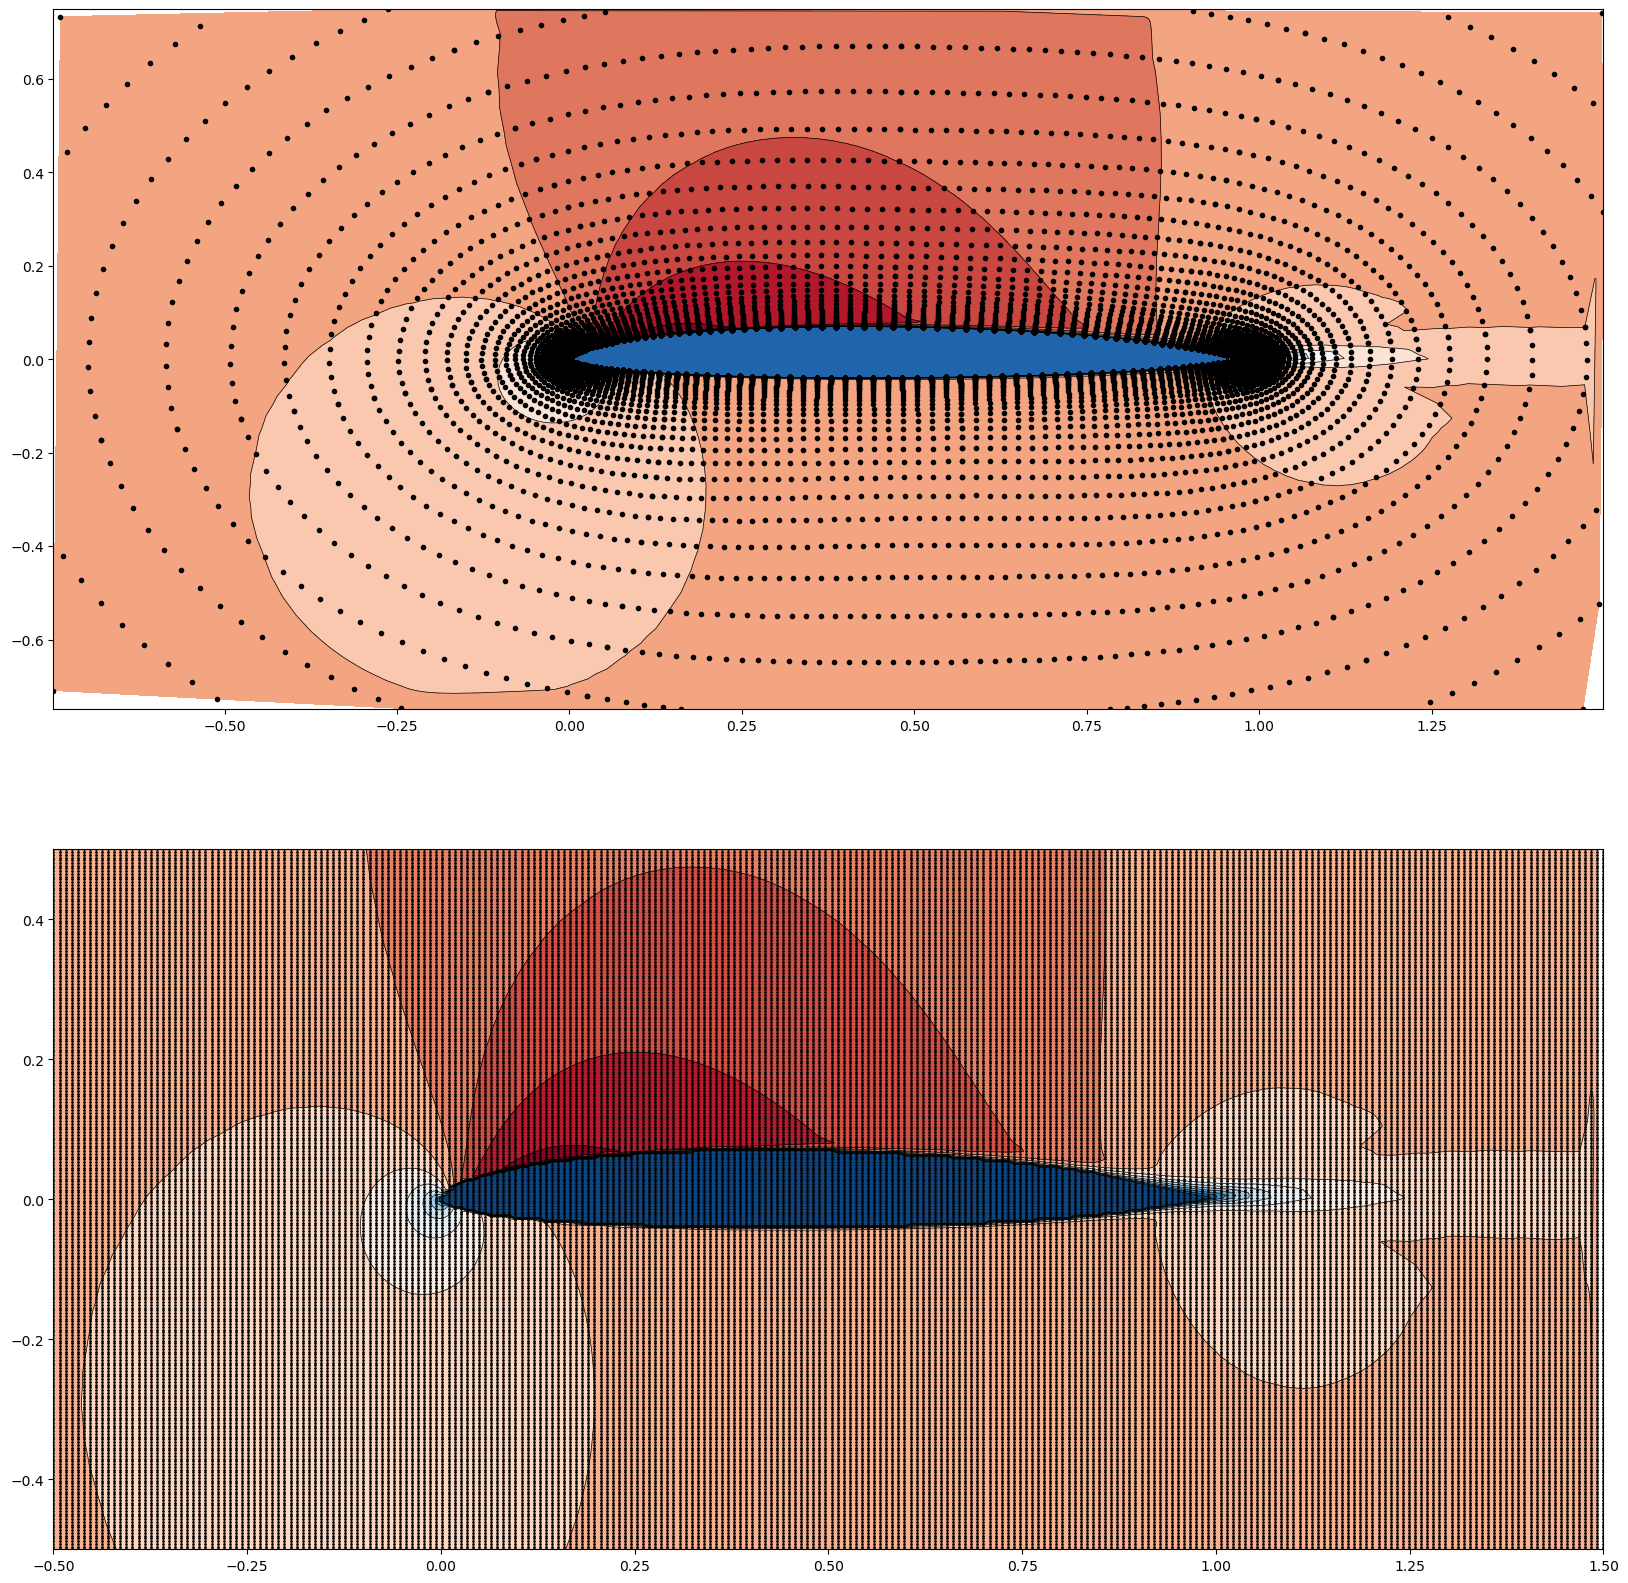

In [46]:
fig, axs = plt.subplots(nrows= 2, ncols = 1, figsize=(20,20))

axs[0].tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr1 = axs[0].tricontourf(x, y, z, levels=14, cmap="RdBu_r")
axs[0].plot(x, y, 'ko', ms=3)

axs[1].contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr2 = axs[1].contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
axs[1].plot(Xi.ravel(), Yi.ravel(), 'ko', ms=1)